In [1]:
import numpy as np
import pandas as pd
#import bamboolib as bam

In [2]:
#as we might see if "Modeladi" is null other values are null as well.The internet connection may cause this problem while scrapping from Website
df1 = pd.read_csv("./dod[81-145].csv")

# Step: Drop columns
df1 = df1.drop(columns=['web-scraper-order'])

# Step: Drop columns
df1 = df1.drop(columns=['linkgetter'])

# Step: Manipulate strings of 'Fiyat' via Find '₺' and Replace with ''
df1["Fiyat"] = df1["Fiyat"].str.replace('₺', '', regex=False)
# Step: Manipulate strings of '.' via Find '₺' and Replace with ''
df1["Fiyat"] = df1["Fiyat"].str.replace('.', '', regex=False)

# Step: Change data type of Fiyat to Integer
df1['Fiyat'] = df1['Fiyat'].astype('Int64')
Roll = [i for i in range(len(df1))]
df1["RowIndex"] =Roll


# Step: Drop rows where RowIndex >= 659
df1 = df1.loc[~(df1['RowIndex'] >= 659)]

# Step: Drop rows where Modeladi is missing
df1 = df1.loc[~(df1['Modeladi'].isna())]

# Step: Drop columns
df1 = df1.drop(columns=['web-scraper-start-url', 'linkgetter-href', 'RowIndex','Konum_detay'])

df1

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Rehin_Durum,Haciz_Durum,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Ford,Fiesta,Gümüş Gri,167 Km/h,124,4.0,45.0,8.6,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıImmobi...",...,Yok*,Yok*,1.4 Lt,Benzin,Manuel,80 Hp,Garantisiz,Önden Çekiş,Ankara,210000
1,Peugeot,206,Açık Sarı,172 Km/h,120,4.0,50.0,8.4,8.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.4 Lt,Benzin,Manuel,75 Hp,Garantisiz,Önden Çekiş,Adana,170000
2,HYUNDAİ,Getz,Mavi,166 Km/h,119,4.0,45.0,NaN,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıImmobi...",...,Yok*,Yok*,1.3 Lt,LPG,Manuel,70 Hp,Garantisiz,Önden Çekiş,Kayseri,285000
3,Audi,A6,Mavi,240 Km/h,450,6.0,80.0,11.9,24.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,3 Lt,Dizel,Otomatik,225 Hp,Garantisiz,4x4,İstanbul,680000
4,Ford,Fusion,Aytozu Gri,176 Km/h,146,4.0,45.0,10.3,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Benzin,Otomatik,100 Hp,Garantisiz,Önden Çekiş,Samsun,286750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,387500
654,Volkswagen,Polo,Turuncu,170 Km/h,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1 Lt,Benzin,Manuel,75 Hp,Garantisiz,Önden Çekiş,İstanbul,390000
655,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,394500
656,Volkswagen,Polo,Beyaz,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


In [3]:
df2 = pd.read_csv("./dod (1).csv")
# Step: Drop columns
df2 = df2.drop(columns=['web-scraper-order'])

# Step: Drop columns
df2 = df2.drop(columns=['linkgetter'])

# Step: Manipulate strings of 'Fiyat' via Find '₺' and Replace with ''
df2["Fiyat"] = df2["Fiyat"].str.replace('₺', '', regex=False)
# Step: Manipulate strings of '.' via Find '₺' and Replace with ''
df2["Fiyat"] = df2["Fiyat"].str.replace('.', '', regex=False)

# Step: Change data type of Fiyat to Integer
df2['Fiyat'] = df2['Fiyat'].astype('Int64')

# Step: Drop rows where Modeladi is missing
df2 = df2.loc[~(df2['Modeladi'].isna())]

# Step: Drop columns
df2 = df2.drop(columns=['web-scraper-start-url', 'linkgetter-href','Konum_detay'])

# Step: Change data type of Silindir to Object
df2['Silindir'] = df2['Silindir'].astype('object')

import pandas as pd; import numpy as np
# Step: Change data type of Silindir to Float
df2['Silindir'] = pd.to_numeric(df2['Silindir'], downcast='float', errors='coerce')

# Step: Change data type of Depo to Float
df2['Depo'] = pd.to_numeric(df2['Depo'], downcast='float', errors='coerce')

# Step: Change data type of Tuketim to Float
df2['Tuketim'] = pd.to_numeric(df2['Tuketim'], downcast='float', errors='coerce')

# Step: Change data type of Sübap to Float
df2['Sübap'] = pd.to_numeric(df2['Sübap'], downcast='float', errors='coerce')

# Step: Left Join with df1 where Modeladi=Modeladi, MaxTork=MaxTork, Kasa_Tipi=Kasa_Tipi, Haciz_Durum=Haciz_Durum, Yakit=Yakit, Depo=Depo, Aktarma=Aktarma, Rehin_Durum=Rehin_Durum, Sübap=Sübap, Tuketim=Tuketim, Model_Yili=Model_Yili, MarkaAdi=MarkaAdi, Fiyat=Fiyat, Silindir=Silindir, Guvenlik Group=Guvenlik Group, Tsi(Turbo Supercharger Injection)=Tsi(Turbo Supercharger Injection), Max_Güc=Max_Güc, Renk=Renk, Garanti=Garanti, Konum_sehir=Konum_sehir, Sanziman=Sanziman, Hiz=Hiz, Konfor Group=Konfor Group
df = pd.merge(df2, df1, how='outer', on=['Modeladi', 'MaxTork', 'Kasa_Tipi', 'Haciz_Durum', 'Yakit', 'Depo', 'Aktarma', 'Rehin_Durum', 'Sübap', 'Tuketim', 'Model_Yili', 'MarkaAdi', 'Fiyat', 'Silindir', 'Guvenlik Group', 'Tsi(Turbo Supercharger Injection)', 'Max_Güc', 'Renk', 'Garanti', 'Konum_sehir', 'Sanziman', 'Hiz', 'Konfor Group'])

df

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Rehin_Durum,Haciz_Durum,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen,Polo,Fildişi,170 Km/h,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1 Lt,Benzin,Manuel,75 Hp,3 Aylık DOD Garanti,Önden Çekiş,Hatay,400000
1,Volkswagen,Polo,Uranüs Gri,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen,Polo,Saf Beyaz,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen,Polo,Beyaz,185 Km/h,250,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Otomatik,95 Hp,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,445000
4,Volkswagen,Polo,Beyaz,187 Km/h,175,3.0,40.0,5.8,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1 Lt,Benzin,Otomatik,95 Hp,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen,Polo,Turuncu,170 Km/h,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1 Lt,Benzin,Manuel,75 Hp,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen,Polo,Beyaz,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Yok*,Yok*,1.6 Lt,Dizel,Manuel,80 Hp,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


### What're we going to do?
###### +Drop columns=['Haciz_Durum', 'Rehin_Durum'] because they all 0.They won.'t affect to model
###### + Make necessary reducing unique values for some columns in order to make One Hot Encoding(we don't have much data for too much unique values and when we make One Hot Encoding for these columns there's going to be too much column and   our model won't learn just memorize) -- for example column=['Renk']
###### +Make Necesseary changes and castings for  needed columns
###### +One Hot Encoding for some Columns
###### +Label Encoding for some Columns(manuel or automatic)
###### +Merge columns=['MarkaAdi', 'Modeladi']  then  Binary Encoding  for merged column 


In [4]:
df.drop(columns=['Haciz_Durum', 'Rehin_Durum'],axis =1, inplace=True)
df

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen,Polo,Fildişi,170 Km/h,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1 Lt,Benzin,Manuel,75 Hp,3 Aylık DOD Garanti,Önden Çekiş,Hatay,400000
1,Volkswagen,Polo,Uranüs Gri,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen,Polo,Saf Beyaz,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen,Polo,Beyaz,185 Km/h,250,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Otomatik,95 Hp,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,445000
4,Volkswagen,Polo,Beyaz,187 Km/h,175,3.0,40.0,5.8,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1 Lt,Benzin,Otomatik,95 Hp,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen,Polo,Turuncu,170 Km/h,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1 Lt,Benzin,Manuel,75 Hp,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen,Polo,Siyah,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Manuel,80 Hp,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen,Polo,Beyaz,175 Km/h,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6 Lt,Dizel,Manuel,80 Hp,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


In [5]:
import pandas as pd; import numpy as np
# Step: Replace  Km/h with  in 'Hiz'
df['Hiz'] = df['Hiz'].replace(' Km/h', ' ')

import pandas as pd; import numpy as np
# Step: Manipulate strings of 'Hiz' via Find 'Km/h' and Replace with ''
df["Hiz"] = df["Hiz"].str.replace('Km/h', '', regex=False)

# Step: Manipulate strings of 'Tsi(Turbo Supercharger Injection)' via Find 'Lt' and Replace with ''
df["Tsi(Turbo Supercharger Injection)"] = df["Tsi(Turbo Supercharger Injection)"].str.replace('Lt', '', regex=False)

# Step: Manipulate strings of 'Max_Güc' via Find 'Hp' and Replace with ''
df["Max_Güc"] = df["Max_Güc"].str.replace('Hp', '', regex=False)

df

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen,Polo,Fildişi,170,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1,Benzin,Manuel,75,3 Aylık DOD Garanti,Önden Çekiş,Hatay,400000
1,Volkswagen,Polo,Uranüs Gri,175,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen,Polo,Saf Beyaz,175,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen,Polo,Beyaz,185,250,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Otomatik,95,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,445000
4,Volkswagen,Polo,Beyaz,187,175,3.0,40.0,5.8,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen,Polo,Turuncu,170,95,3.0,40.0,4.1,12.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen,Polo,Beyaz,175,230,4.0,40.0,4.5,16.0,"[{""Guvenlik Group"":""Güvenlik DonanımlarıABS Fr...",...,Hatchback,"[{""Konfor Group"":""Konfor Aksesuarları6 Hoparlö...",1.6,Dizel,Manuel,80,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


In [6]:
gl = []
kl = []
def countForSafety_Confort():
    for i in df["Guvenlik Group"]:
        gl.append(i.count("-"))
    for j in df["Konfor Group"]:
        kl.append(j.count("-"))

In [7]:
countForSafety_Confort()

In [8]:
df["Guvenlik Group"]=gl
df["Konfor Group"] =kl

In [9]:
df
#Renkten yapmaya devam et sonra categorilere çevir doru olanlara sonra one hot encoder sonra modeli kurmaya başla
import pandas as pd; import numpy as np
# Step: Keep rows where Renk contains Gri (case-sensitive, regular expression)
RenkGri = df.loc[df['Renk'].str.contains('Gri', case=True, regex=True, na=False)]



In [10]:
#Renkte 127 tane var.ama bunları biraz azaltmam lazım.Mavi-Açık Mavi-Lacivert gibi 3 kategoriye.Mesela Saf Beyaz ve Beyazı tek kategoriye düşürmek niyetindeyim.Kırmızı BEyaz,Gri-siyah gibi olanları ayrı kategori yapıp çift renk 1-0 olarak orda ayrı bir kategori oluşturuabilirim daha iyi olur

Beyaz-Saf Beyaz-Opak Beyaz-Kar Beyazı-Alp Beyazı-Ibis Beyazı -Sedef Beyaz -Buz Beyazı -Kutup Beyazı -->Beyaz
Siyah- Diğer Siyah tamamı --> Siyah ve Metalik--> Metalik Siyah

Normal Gri --> Gri-Atom Gri-Akik Gri
Açık Gri --> Gümüş Gri-Tungsten Gri -Business Gri-Gri Füme-Platin Gri-Buz Gri-Platınyum Gri-Aytozu Gri-Atlas Gri-Kaya Grisi-Tekno Gri-Hakim Gri-Bulut Gri
Koyu Gri -->Indiyum Grisi-Uranus Gri-Uranüs Gri-Fırtına Gri-Yunus Gri-Füme Granit Gri-Titanyum Gri-Antresit Gri

Normal Mavi--> Mavi
Açık Mavi-->Yarış Mavisi-Sedefli Mürekkep Mavi-Demirci Mavisi-Arıel Mavi-Aruz Mavi-Amparo Mavi-Açık Mavi
Koyu Mavi(Lacivert Yazacam Yerine)--> Harvard Mavi-Atlantik Mavi-Gece Mavisi-Kosmos Mavi-Pasifik Mavisi-Derin Mavi-İpek Mavisi-Okyanus Mavisi-Kozmik Mavi-Koyu Mavi

Normal Kırmızı-->Kırmızı,
AÇık Kırmızı-->Açık Kırmızı,Sedefli Misano Kırmızısı, Parlak Kırmızı 
Koyu Kırmızı-->Alev Kırmızısı,Manyetik Kırmızı,Ateş Kırmızı,Bayrak Kırmızı,Mercan Kırmızı,Tango

Yeşil Kendisi var
Sarı kendisi var sadece

Bordo ve Turkuaz ı ayrı renk olarak AÇık Mavi veya Koyu Kırmızı olarak değiştirdim 

BEj olarak toplasan 5 tane araç var yok o yüzden MEtalik ve normal olarak sınıflandırıcam

Grı ve Safir Siyah ı en sonra ekleyecem

Galapagos Antrasit Gri olarak sayıcam

1 tane menekşe moru var onu da Koyu Mor olarak kaydedicem


In [11]:
# Step: Set values of Renk to Gri where Renk is one of: Gri, Atom Gri, Akik Gri
RenkGri.loc[RenkGri['Renk'].isin(['Gri', 'Atom Gri', 'Akik Gri']), 'Renk'] = 'Gri'
# Step: Set values of Renk to Açık Gri where Renk is one of: Gümüş Gri, Tungsten Gri, Business Gri, Gri Füme, Platınyum Gri, Aytozu Gri, Atlas Gri, Kaya  Grisi, Tekno Gri, Hakim Gri, Bulut Gri
RenkGri.loc[RenkGri['Renk'].isin(['Gümüş Gri', 'Tungsten Gri', 'Business Gri', 'Gri Füme', 'Platınyum Gri','Platin Gri','Buz Gri', 'Aytozu Gri', 'Atlas Gri', 'Kaya  Grisi', 'Tekno Gri', 'Hakim Gri', 'Bulut Gri']), 'Renk'] = 'Açık Gri'
# Step: Set values of MarkaAdi to Koyu Gri where Renk is one of: İndiyum Grisi, Uranüs Gri, Uranus Gri, Fırtına Gri, Yunus Gri, Füme Granit Gri, Titanyum Gri, Antresit Gri
RenkGri.loc[RenkGri['Renk'].isin(['İndiyum Grisi', 'Uranüs Gri', 'Uranus Gri', 'Fırtına Gri', 'Yunus Gri', 'Füme Granit Gri', 'Titanyum Gri', 'Antresit Gri','Duman Gri']), 'Renk'] = 'Koyu Gri'
# Step: Set values of Renk to Metalik Gri where Renk is one of: Metalik Muson Gri, Metalik Floret Gümüş Grisi, Metalik Gri, Metalik Teknik Gri, Metalik Manhattan Gri, Metalik Estrella Gri
RenkGri.loc[RenkGri['Renk'].isin(['Metalik Muson Gri', 'Metalik Floret Gümüş Grisi', 'Metalik Gri', 'Metalik Teknik Gri', 'Metalik Manhattan Gri', 'Metalik Estrella Gri']), 'Renk'] = 'Metalik Gri'
# Step: Set values of MarkaAdi to Gri Siyah where Renk is one of: Gri Siyah, Gri-siyah
RenkGri.loc[RenkGri['Renk'].isin(['Gri Siyah', 'Gri-siyah']), 'Renk'] = 'Gri Siyah'

RenkGri = RenkGri["Renk"]
RenkGri

1          Koyu Gri
16         Açık Gri
17         Açık Gri
22              Gri
25         Açık Gri
           ...     
1496    Metalik Gri
1497            Gri
1498       Açık Gri
1499            Gri
1511       Koyu Gri
Name: Renk, Length: 351, dtype: object

In [12]:
df["Renk"].loc[df['Renk'].str.contains('Gri', case=True, regex=True, na=False)] = RenkGri #Sonunda bölmesine yaparak olayı bitiriyoruz

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\2266298095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Gri', case=True, regex=True, na=False)] = RenkGri #Sonunda bölmesine yaparak olayı bitiriyoruz


In [13]:
RenkBeyaz = df.loc[df['Renk'].str.contains('Beyaz', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Beyaz where Renk is one of: Saf Beyaz, Beyaz, Buz Beyazı, Alp Beyazı, Opak Beyaz, İnci Beyazı, Sedef Beyaz, Kutup Beyazı, Kar Beyazı, Şeker Beyazı, Ibis Beyazı, Opak Bila Beyaz
RenkBeyaz.loc[RenkBeyaz['Renk'].isin(['Saf Beyaz', 'Beyaz', 'Buz Beyazı', 'Alp Beyazı', 'Opak Beyaz', 'İnci Beyazı', 'Sedef Beyaz', 'Kutup Beyazı', 'Kar Beyazı', 'Şeker Beyazı', 'Ibis Beyazı', 'Opak Bila Beyaz']), 'Renk'] = 'Beyaz'

RenkBeyaz =RenkBeyaz["Renk"]

In [14]:
df["Renk"].loc[df['Renk'].str.contains('Beyaz', case=True, regex=True, na=False)] = RenkBeyaz

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\1073037001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Beyaz', case=True, regex=True, na=False)] = RenkBeyaz


In [15]:
RenkSiyah = df.loc[df['Renk'].str.contains('Siyah', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Siyah where Renk is one of: Basalt Siyahı, Siyah, Metalik Siyah, Derin Siyah, Kahve Siyah, Opak Siyah, Gece Siyahı, Büyülü Siyah, Siyah İnci, İnci Siyah, Parlak Siyah
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Basalt Siyahı', 'Siyah', 'Metalik Siyah', 'Derin Siyah', 'Kahve Siyah', 'Opak Siyah', 'Gece Siyahı', 'Büyülü Siyah', 'Siyah İnci', 'İnci Siyah', 'Parlak Siyah']), 'Renk'] = 'Siyah'

# Step: Set values of MarkaAdi to Metalik Siyah where Renk is one of: Metalik Mitos Siyah, Metlik Mitos Siyah
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Metalik Mitos Siyah', 'Metlik Mitos Siyah']), 'Renk'] = 'Metalik Siyah'

import pandas as pd; import numpy as np
# Step: Set values of MarkaAdi to Beyaz Siyah where Renk is one of: Beyaz Siyah, Siyah-beyaz
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Beyaz Siyah', 'Siyah-beyaz']), 'MarkaAdi'] = 'Beyaz Siyah'

RenkSiyah = RenkSiyah["Renk"]
RenkSiyah

13      Siyah
18      Siyah
32      Siyah
42      Siyah
53      Siyah
        ...  
1477    Siyah
1485    Siyah
1501    Siyah
1512    Siyah
1514    Siyah
Name: Renk, Length: 228, dtype: object

In [16]:
df["Renk"].loc[df['Renk'].str.contains('Siyah', case=True, regex=True, na=False)] = RenkSiyah

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\3398056938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Siyah', case=True, regex=True, na=False)] = RenkSiyah


In [17]:
RenkMavi = df.loc[df['Renk'].str.contains('Mavi', case=True, regex=True, na=False)]
RenkMavi
import pandas as pd; import numpy as np
# Step: Set values of Renk to Lacivert where Renk is one of: Harvard Mavi, Atlantik Mavi, Gece Mavisi, Koyu Mavi, Kozmik Mavi, Kosmos Mavi, Pasifik Mavisi, Derin Mavi, İpek Mavisi, Okyanus Mavisi
RenkMavi.loc[RenkMavi['Renk'].isin(['Harvard Mavi', 'Atlantik Mavi', 'Gece Mavisi', 'Koyu Mavi', 'Kozmik Mavi', 'Kosmos Mavi', 'Cosmos Mavi','Pasifik Mavisi', 'Derin Mavi', 'İpek Mavisi', 'Okyanus Mavisi']), 'Renk'] = 'Lacivert'

# Step: Set values of Renk to Açık Mavi where Renk is one of: Yarış Mavisi, Sedefli Mürekkep Mavi, Demirci Mavisi, Arıel Mavi, Aruz Mavi, Amparo Mavi, Açık Mavi
RenkMavi.loc[RenkMavi['Renk'].isin(['Yarış Mavisi', 'Sedefli Mürekkep Mavi', 'Demirci Mavisi', 'Arıel Mavi', 'Aruz Mavi', 'Amparo Mavi', 'Açık Mavi']), 'Renk'] = 'Açık Mavi'

# Step: Set values of Renk to Metalik Mavi where Renk is one of: Metalik Kosmos Mavisi-gri Tent, Metalik Hainan Mavisi, Metalik Scuba Mavi, Metalik Mavi
RenkMavi.loc[RenkMavi['Renk'].isin(['Metalik Kosmos Mavisi-gri Tent', 'Metalik Hainan Mavisi', 'Metalik Scuba Mavi', 'Metalik Mavi']), 'Renk'] = 'Metalik Mavi'

RenkMavi =RenkMavi["Renk"]
RenkMavi

30          Lacivert
31          Lacivert
56          Lacivert
59              Mavi
67         Açık Mavi
            ...     
1405            Mavi
1407    Metalik Mavi
1408            Mavi
1412            Mavi
1422            Mavi
Name: Renk, Length: 136, dtype: object

In [18]:
df["Renk"].loc[df['Renk'].str.contains('Mavi', case=True, regex=True, na=False)] = RenkMavi

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\2434256255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Mavi', case=True, regex=True, na=False)] = RenkMavi


In [19]:
#ayrıcana lacivert rengi de var 5 tane araç için öle yazılmış
RenkLacivert = df.loc[df['Renk'].str.contains('Lacivert', case=True, regex=True, na=False)]
RenkLacivert

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
30,Volkswagen,Passat,Lacivert,208,200,4.0,59.0,6.8,16.0,9,...,Sedan,18,1.4,Benzin,Manuel,125,Garantisiz,Önden Çekiş,Bursa,715000
31,Volkswagen,Passat,Lacivert,206,250,4.0,59.0,4.6,16.0,8,...,Sedan,16,1.6,Dizel,Otomatik,120,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,740000
56,Volkswagen,Passat,Lacivert,206,250,4.0,59.0,4.6,16.0,8,...,Sedan,16,1.6,Dizel,Otomatik,120,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,880000
174,Volkswagen,Passat,Lacivert,205,250,4.0,59.0,4.6,16.0,7,...,Sedan,13,1.6,Dizel,Otomatik,120,Garantisiz,Önden Çekiş,İstanbul,800000
217,Audi,A3,Lacivert,224,250,4.0,50.0,6.2,16.0,10,...,Sedan,13,1.5,Benzin,Otomatik,150,Garantisiz,Önden Çekiş,İstanbul,840000
226,Audi,A3,Lacivert,224,250,4.0,50.0,6.2,16.0,10,...,Sedan,13,1.5,Benzin,Otomatik,150,DS Garantisi,Önden Çekiş,İstanbul,860000
286,KIA,Rio,Lacivert,185,172,3.0,45.0,5.5,12.0,7,...,Hatchback,13,1,Benzin,Otomatik,100,Garantisiz,Önden Çekiş,Adana,460000
288,KIA,Sportage,Lacivert,180,320,4.0,62.0,NaN,16.0,9,...,Arazi aracı,18,1.6,Dizel,Otomatik,136,Garantisiz,Önden Çekiş,Ankara,752000
403,Volkswagen,Golf,Lacivert,216,250,4.0,50.0,6.5,16.0,8,...,Hatchback,15,1.5,Benzin,Otomatik,150,Garantisiz,Önden Çekiş,Denizli,729900
468,Volkswagen,Passat,Lacivert,220,250,4.0,59.0,6.6,16.0,11,...,Sedan,19,1.5,Benzin,Otomatik,150,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,1200000


In [20]:
RenkKırmızı = df.loc[df['Renk'].str.contains('Kırmızı', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Açık Kırmızı where Renk is one of: Açık Kırmızı, Sedefli Misano Kırmızısı, Parlak Kırmızı
RenkKırmızı.loc[RenkKırmızı['Renk'].isin(['Açık Kırmızı', 'Sedefli Misano Kırmızısı', 'Parlak Kırmızı']), 'Renk'] = 'Açık Kırmızı'

# Step: Set values of Renk to Koyu Kırmızı where Renk is one of: Bayrak Kırmızı, Manyetik Kırmızı, Alev Kırmızısı, Mercan Kırmızı, Ateş Kırmızı, Tango Kırmızı
RenkKırmızı.loc[RenkKırmızı['Renk'].isin(['Bayrak Kırmızı', 'Manyetik Kırmızı', 'Alev Kırmızısı', 'Mercan Kırmızı', 'Ateş Kırmızı', 'Tango Kırmızı']), 'Renk'] = 'Koyu Kırmızı'

RenkKırmızı=RenkKırmızı["Renk"]
RenkKırmızı

28         Açık Kırmızı
37              Kırmızı
91         Koyu Kırmızı
135             Kırmızı
138             Kırmızı
             ...       
1411            Kırmızı
1419       Koyu Kırmızı
1421            Kırmızı
1458    Metalik Kırmızı
1459            Kırmızı
Name: Renk, Length: 112, dtype: object

In [21]:
df["Renk"].loc[df['Renk'].str.contains('Kırmızı', case=True, regex=True, na=False)] = RenkKırmızı

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\199750237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Kırmızı', case=True, regex=True, na=False)] = RenkKırmızı


In [22]:
RenkTuruncu = df.loc[df['Renk'].str.contains('Turuncu', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Koyu Turuncu where Renk is one of: Bakır Turuncu
RenkTuruncu.loc[RenkTuruncu['Renk'].isin(['Bakır Turuncu']), 'Renk'] = 'Koyu Turuncu'

RenkTuruncu=RenkTuruncu["Renk"]
RenkTuruncu

77           Turuncu
139          Turuncu
143          Turuncu
307          Turuncu
311          Turuncu
312          Turuncu
318          Turuncu
329          Turuncu
400          Turuncu
417          Turuncu
624          Turuncu
639          Turuncu
640          Turuncu
686          Turuncu
693          Turuncu
829     Koyu Turuncu
830          Turuncu
1272         Turuncu
1513         Turuncu
Name: Renk, dtype: object

In [23]:
df["Renk"].loc[df['Renk'].str.contains('Turuncu', case=True, regex=True, na=False)] = RenkTuruncu

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\3271748861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Turuncu', case=True, regex=True, na=False)] = RenkTuruncu


In [24]:
RenkGümüş = df.loc[df['Renk'].str.contains('Gümüş', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Gümüş where Renk is one of: Pirit Gümüş, Elmas Gümüş, Refleks Gümüş
RenkGümüş.loc[RenkGümüş['Renk'].isin(['Pirit Gümüş', 'Elmas Gümüş', 'Refleks Gümüş']), 'Renk'] = 'Gümüş'

RenkGümüş=RenkGümüş["Renk"]
RenkGümüş

35      Gümüş
173     Gümüş
387     Gümüş
388     Gümüş
405     Gümüş
441     Gümüş
875     Gümüş
1337    Gümüş
1340    Gümüş
1359    Gümüş
1362    Gümüş
1470    Gümüş
Name: Renk, dtype: object

In [25]:
df["Renk"].loc[df['Renk'].str.contains('Gümüş', case=True, regex=True, na=False)] = RenkGümüş

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\2675617166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Gümüş', case=True, regex=True, na=False)] = RenkGümüş


In [26]:
RenkFüme=df.loc[df['Renk'].str.contains('Füme', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Koyu Gri where Renk is one of: Füme
RenkFüme.loc[RenkFüme['Renk'].isin(['Füme']), 'Renk'] = 'Koyu Gri'

RenkFüme=RenkFüme['Renk']
RenkFüme

74      Koyu Gri
517     Koyu Gri
673     Koyu Gri
715     Koyu Gri
1266    Koyu Gri
Name: Renk, dtype: object

In [27]:
df["Renk"].loc[df['Renk'].str.contains('Füme', case=True, regex=True, na=False)] = RenkFüme

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\3422778538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Füme', case=True, regex=True, na=False)] = RenkFüme


In [28]:
df

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen,Polo,Fildişi,170,95,3.0,40.0,4.1,12.0,5,...,Hatchback,8,1,Benzin,Manuel,75,3 Aylık DOD Garanti,Önden Çekiş,Hatay,400000
1,Volkswagen,Polo,Koyu Gri,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen,Polo,Beyaz,175,230,4.0,40.0,4.5,16.0,5,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen,Polo,Beyaz,185,250,4.0,40.0,4.5,16.0,7,...,Hatchback,11,1.6,Dizel,Otomatik,95,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,445000
4,Volkswagen,Polo,Beyaz,187,175,3.0,40.0,5.8,12.0,8,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen,Polo,Turuncu,170,95,3.0,40.0,4.1,12.0,5,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen,Polo,Beyaz,175,230,4.0,40.0,4.5,16.0,5,...,Hatchback,8,1.6,Dizel,Manuel,80,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


In [29]:
RenkBej=df.loc[df['Renk'].str.contains('Bej', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Bej where Renk is one of: Mojave Bej, Kahverengi Bej, Kapuçino Beji, Metalik Karat Beji
RenkBej.loc[RenkBej['Renk'].isin(['Mojave Bej', 'Kahverengi Bej', 'Kapuçino Beji', 'Metalik Karat Beji']), 'Renk'] = 'Bej'

RenkBej=RenkBej["Renk"]
RenkBej

164     Bej
1072    Bej
1141    Bej
1181    Bej
1249    Bej
Name: Renk, dtype: object

In [30]:
df["Renk"].loc[df['Renk'].str.contains('Bej', case=True, regex=True, na=False)] = RenkBej

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\1932947721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renk"].loc[df['Renk'].str.contains('Bej', case=True, regex=True, na=False)] = RenkBej


In [31]:
import pandas as pd; import numpy as np
# Step: Set values of Renk to Gri where Renk is one of: Grı, Galapagos Antrasit
df.loc[df['Renk'].isin(['Grı', 'Galapagos Antrasit']), 'Renk'] = 'Gri'

# Step: Set values of Renk to Koyu Mor where Renk is one of: Menekşe Moru
df.loc[df['Renk'].isin(['Menekşe Moru']), 'Renk'] = 'Koyu Mor'

# Step: Set values of Renk to Koyu Kırmızı where Renk is one of: Bordo
df.loc[df['Renk'].isin(['Bordo']), 'Renk'] = 'Koyu Kırmızı'

# Step: Set values of Renk to Açık Mavi where Renk is one of: Turkuaz
df.loc[df['Renk'].isin(['Turkuaz']), 'Renk'] = 'Açık Mavi'

# Step: Set values of Renk to Metalik Siyah where Renk is one of: Safir Siyah
df.loc[df['Renk'].isin(['Safir Siyah']), 'Renk'] = 'Metalik Siyah'

# Step: Set values of Renk to Beyaz Siyah where Renk is one of: Siyah-beyaz
df.loc[df['Renk'].isin(['Siyah-beyaz']), 'Renk'] = 'Beyaz Siyah'

df

#RENKLER BURADA BİTTİ

,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen,Polo,Fildişi,170,95,3.0,40.0,4.1,12.0,5,...,Hatchback,8,1,Benzin,Manuel,75,3 Aylık DOD Garanti,Önden Çekiş,Hatay,400000
1,Volkswagen,Polo,Koyu Gri,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen,Polo,Beyaz,175,230,4.0,40.0,4.5,16.0,5,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen,Polo,Beyaz,185,250,4.0,40.0,4.5,16.0,7,...,Hatchback,11,1.6,Dizel,Otomatik,95,3 Aylık DOD Garanti,Önden Çekiş,İstanbul,445000
4,Volkswagen,Polo,Beyaz,187,175,3.0,40.0,5.8,12.0,8,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen,Polo,Turuncu,170,95,3.0,40.0,4.1,12.0,5,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen,Polo,Siyah,175,230,4.0,40.0,4.5,16.0,6,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen,Polo,Beyaz,175,230,4.0,40.0,4.5,16.0,5,...,Hatchback,8,1.6,Dizel,Manuel,80,3 Aylık DOD Garanti,Önden Çekiş,İzmir,395000


In [32]:
import pandas as pd; import numpy as np
# Step: Keep rows where Modeladi contains Clio (case-sensitive, regular expression)
Clio = df.loc[df['Modeladi'].str.contains('Clio', case=True, regex=True, na=False)]# There're Clio Sport Tourer and Clio.We ll assume they're similiar

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to Clio where Modeladi contains Clio (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('Clio', case=True, regex=True, na=False), 'Modeladi'] = 'Clio'

Passat = df.loc[df['Modeladi'].str.contains('Passat', case=True, regex=True, na=False)]#There're Passat and Passat Variant
df.loc[df['Modeladi'].str.contains('Passat', case=True, regex=True, na=False), 'Modeladi'] = 'Passat'
import pandas as pd; import numpy as np
# Step: Set values of Modeladi to Q3 where Modeladi contains Q3 (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('Q3', case=True, regex=True, na=False), 'Modeladi'] = 'Q3'

# Step: Keep rows where Modeladi contains 2 Serisi (case-sensitive, regular expression)
df2Serisi = df.loc[df['Modeladi'].str.contains('2 Serisi', case=True, regex=True, na=False)]#here're 2 Serisi and 2 Serisi Active Tourer

df

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to 2 Serisi where Modeladi contains 2 Serisi (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('2 Serisi', case=True, regex=True, na=False), 'Modeladi'] = '2 Serisi'

dfFiorino = df.loc[df['Modeladi'].str.contains('Fiorino', case=True, regex=True, na=False)]#here're Fiorino and Fiorino Panorama

df.loc[df['Modeladi'].str.contains('Fiorino', case=True, regex=True, na=False), 'Modeladi'] = 'Fiorino'

import pandas as pd; import numpy as np
# Step: Keep rows where Modeladi contains 500 (case-sensitive, regular expression)
df500 = df.loc[df['Modeladi'].str.contains('500', case=True, regex=True, na=False)] #3 model for Fiat 500,500X,500L

import pandas as pd; import numpy as np
# Step: Set values of MarkaAdi to 500 where (Modeladi contains 500 (case-sensitive, regular expression)) and (MarkaAdi is one of: Fiat)
df.loc[(df['Modeladi'].str.contains('500', case=True, regex=True, na=False)) & (df['MarkaAdi'].isin(['Fiat'])), 'MarkaAdi'] = '500'

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to 500 where Modeladi is one of: 500, 500L, 500X
df.loc[df['Modeladi'].isin(['500', '500L', '500X']), 'Modeladi'] = '500'

new_items = [a+" "+b for a,b in zip(df["MarkaAdi"],df["Modeladi"])] 
new_items
df["Marka_Model"] =new_items
import pandas as pd; import numpy as np
# Step: Rearranged the order of the columns
df = df[['Marka_Model'] + ['MarkaAdi', 'Modeladi', 'Renk', 'Hiz', 'MaxTork', 'Silindir', 'Depo', 'Tuketim', 'Sübap', 'Guvenlik Group', 'Model_Yili', 'Kasa_Tipi', 'Konfor Group', 'Tsi(Turbo Supercharger Injection)', 'Yakit', 'Sanziman', 'Max_Güc', 'Garanti', 'Aktarma', 'Konum_sehir', 'Fiyat']]

# Step: Drop columns
#ŞİMDİLİK###df = df.drop(columns=['MarkaAdi', 'Modeladi'])


# Step: Change data type of Hiz to Integer
df['Hiz'] = pd.to_numeric(df['Hiz'], downcast='integer', errors='coerce')

# Step: Change data type of MaxTork to Integer
df['MaxTork'] = pd.to_numeric(df['MaxTork'], downcast='integer', errors='coerce')

# Step: Change data type of Max_Güc to Integer
df['Max_Güc'] = pd.to_numeric(df['Max_Güc'], downcast='integer', errors='coerce')




In [33]:
# Step: Set values of Garanti to 1 Yıla Kadar where Garanti is one of: 3 Aylık DOD Garanti, 1 Yıllık DOD Garanti, 6 Aylık DOD Garanti
df.loc[df['Garanti'].isin(['3 Aylık DOD Garanti', '1 Yıllık DOD Garanti', '6 Aylık DOD Garanti']), 'Garanti'] = '1 Yıla Kadar'

# Step: Set values of Garanti to 1 YIldan Uzun where Garanti is one of: DS Garantisi
df.loc[df['Garanti'].isin(['DS Garantisi']), 'Garanti'] = '1 YIldan Uzun'

In [34]:
df

,Marka_Model,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum_sehir,Fiyat
0,Volkswagen Polo,Volkswagen,Polo,Fildişi,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Hatay,400000
1,Volkswagen Polo,Volkswagen,Polo,Koyu Gri,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,411500
2,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Çorum,415000
3,Volkswagen Polo,Volkswagen,Polo,Beyaz,185.0,250.0,4.0,40.0,4.5,16.0,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,İstanbul,445000
4,Volkswagen Polo,Volkswagen,Polo,Beyaz,187.0,175.0,3.0,40.0,5.8,12.0,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,İstanbul,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,387500
1513,Volkswagen Polo,Volkswagen,Polo,Turuncu,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,İstanbul,390000
1514,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,İstanbul,394500
1515,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,İzmir,395000


In [35]:
import pandas as pd; import numpy as np
# Step: Set values of Konum_sehir to Marmara Bölgesi where Konum_sehir is one of: İstanbul, Bursa, Kocaeli, Çanakkale, Sakarya
df.loc[df['Konum_sehir'].isin(['İstanbul', 'Bursa', 'Kocaeli', 'Çanakkale', 'Balıkesir','Tekirdağ','Sakarya']), 'Konum_sehir'] = 'Marmara Bölgesi'

# Step: Set values of Konum_sehir to Akdeniz Bölgesi where Konum_sehir is one of: Hatay, Antalya, Kahramanmaraş, Mersin, Adana
df.loc[df['Konum_sehir'].isin(['Hatay', 'Antalya', 'Kahramanmaraş', 'Mersin', 'Adana']), 'Konum_sehir'] = 'Akdeniz Bölgesi'

# Step: Set values of Konum_sehir to Ege Bölgesi where Konum_sehir is one of: İzmir, Denizli, Manisa, Aydın
df.loc[df['Konum_sehir'].isin(['İzmir', 'Denizli', 'Manisa', 'Aydın']), 'Konum_sehir'] = 'Ege Bölgesi'

# Step: Set values of Konum_sehir to İç Anadolu Bölgesi where Konum_sehir is one of: Konya, Ankara, Aksaray, Kayseri
df.loc[df['Konum_sehir'].isin(['Konya', 'Ankara', 'Aksaray', 'Kayseri']), 'Konum_sehir'] = 'İç Anadolu Bölgesi'

# Step: Set values of Konum_sehir to Karadeniz Bölgesi where Konum_sehir is one of: Çorum, Samsun, Giresun
df.loc[df['Konum_sehir'].isin(['Çorum', 'Samsun', 'Giresun']), 'Konum_sehir'] = 'Karadeniz Bölgesi'

# Step: Set values of Konum_sehir to GüneyDoğu Anadolu Bölgesi where Konum_sehir is one of: Gaziantep, Şanlıurfa
df.loc[df['Konum_sehir'].isin(['Gaziantep', 'Şanlıurfa']), 'Konum_sehir'] = 'GüneyDoğu Anadolu Bölgesi'

In [36]:
# Step: Rename column
df=df.rename(columns={'Konum_sehir': 'Konum'})

In [37]:
df

,Marka_Model,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,Volkswagen Polo,Volkswagen,Polo,Fildişi,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,Volkswagen Polo,Volkswagen,Polo,Koyu Gri,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,Volkswagen Polo,Volkswagen,Polo,Beyaz,185.0,250.0,4.0,40.0,4.5,16.0,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,Volkswagen Polo,Volkswagen,Polo,Beyaz,187.0,175.0,3.0,40.0,5.8,12.0,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,Volkswagen Polo,Volkswagen,Polo,Turuncu,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


 Now drop unnecessary rows then move to Encoding

In [38]:
df = df.loc[~(df['Yakit'].isin(['Elektrik']))]

In [39]:
df

,Marka_Model,MarkaAdi,Modeladi,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,Volkswagen Polo,Volkswagen,Polo,Fildişi,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,Volkswagen Polo,Volkswagen,Polo,Koyu Gri,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,Volkswagen Polo,Volkswagen,Polo,Beyaz,185.0,250.0,4.0,40.0,4.5,16.0,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,Volkswagen Polo,Volkswagen,Polo,Beyaz,187.0,175.0,3.0,40.0,5.8,12.0,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,Volkswagen Polo,Volkswagen,Polo,Turuncu,170.0,95.0,3.0,40.0,4.1,12.0,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,Volkswagen Polo,Volkswagen,Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,Volkswagen Polo,Volkswagen,Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


In [40]:
# Encoding:
#                                  Aktarma : 4x4 > Önden Çekiş > Arkadan Çekiş
#                                  Garanti: 1 yıldan uzun > 1 yıla kadar > Garantisiz
#                                  Sanziman: Otomatik > Manuel
#                                  Yakıt:Benzin > Dizel > LPG


In [41]:
from sklearn.preprocessing import OneHotEncoder
import joblib


oheCATEGORICALPARTS = OneHotEncoder()

OHE_categorical_columns = ['Renk','Kasa_Tipi','Konum']
OHE_Joblib_Save=df.copy()
oheCATEGORICALPARTS.fit_transform(OHE_Joblib_Save[OHE_categorical_columns])

joblib.dump(oheCATEGORICALPARTS,"OHEPART.joblib") 


['OHEPART.joblib']

In [42]:
OheJoblibLoadedFile=joblib.load("./OHEPART.joblib")
#OheJoblibLoadedFile
OheJoblibLoadedFile.sparse
print(OheJoblibLoadedFile.feature_names_in_)
print(OheJoblibLoadedFile.n_features_in_)
#übüründen.infrequent_categories_
OheJoblibLoadedFile.categories_

['Renk' 'Kasa_Tipi' 'Konum']
3


[array(['Açık Gri', 'Açık Kırmızı', 'Açık Mavi', 'Açık Sarı', 'Bakır',
        'Bej', 'Beyaz', 'Beyaz Siyah', 'Bronz', 'Fildişi', 'Gri',
        'Gri Siyah', 'Gümüş', 'Kahverengi', 'Koyu Gri', 'Koyu Kırmızı',
        'Koyu Mor', 'Koyu Turuncu', 'Kırmızı', 'Kırmızı Beyaz',
        'Kırmızı Siyah', 'Lacivert', 'Mavi', 'Mavi Beyaz', 'Mavi Siyah',
        'Metalik Beyaz', 'Metalik Gri', 'Metalik Kırmızı', 'Metalik Mavi',
        'Metalik Siyah', 'Metalik Yeşil', 'Sarı', 'Sarı Siyah', 'Siyah',
        'Turuncu', 'Yeşil'], dtype=object),
 array(['Arazi aracı', 'Cabriolet', 'Cityvan', 'Coupe', 'Hatchback', 'MPV',
        'Minibüs', 'Pick-up', 'Sedan', 'Wagon'], dtype=object),
 array(['Akdeniz Bölgesi', 'Ege Bölgesi', 'GüneyDoğu Anadolu Bölgesi',
        'Karadeniz Bölgesi', 'Marmara Bölgesi', 'İç Anadolu Bölgesi'],
       dtype=object)]

In [43]:
df_ToTakeMarka_Model = df.copy()


In [44]:
Marka_Model_original=df["Marka_Model"]
Marka_Model_original # just control

0       Volkswagen Polo
1       Volkswagen Polo
2       Volkswagen Polo
3       Volkswagen Polo
4       Volkswagen Polo
             ...       
1512    Volkswagen Polo
1513    Volkswagen Polo
1514    Volkswagen Polo
1515    Volkswagen Polo
1516    Volkswagen Polo
Name: Marka_Model, Length: 1516, dtype: object

In [45]:
#pip install category_encoders

In [46]:
import category_encoders  as ce

In [47]:
ce_bin2 = ce.binary.BinaryEncoder()
joblib_icin_kayd=ce_bin2.fit_transform(df_ToTakeMarka_Model["Marka_Model"].astype(str))
print(type(joblib_icin_kayd))
print(type(ce_bin2))
ce_bin2 

<class 'pandas.core.frame.DataFrame'>
<class 'category_encoders.binary.BinaryEncoder'>


BinaryEncoder(cols=['Marka_Model'],
              mapping=[{'col': 'Marka_Model',
                        'mapping':       Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
 1                0              0              0              0   
 2                0              0              0              0   
 3                0              0              0              0   
 4                0              0              0              0   
 5                0              0              0              0   
...             ...            ...            ...            ...   
 168              1              0              1              0   
 169              1              0              1              0   
 170              1              0              1              0   
-1                0              0              0              0   
-2                0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7  
 1                0              0              0              1  
 2                0              0              1              0  
 3                0              0              1              1  
 4                0              1              0              0  
 5                0              1              0              1  
...             ...            ...            ...            ...  
 168              1              0              0              0  
 169              1              0              0              1  
 170              1              0              1              0  
-1                0              0              0              0  
-2                0              0              0              0  

[172 rows x 8 columns]}])

In [48]:
import joblib

joblib.dump(ce_bin2,"hot2BinaryEncoder.joblib") #saved as Joblib ,going to use it in ClassFOrAll

['hot2BinaryEncoder.joblib']

In [49]:
ce_bin = ce.binary.BinaryEncoder(cols = ["Marka_Model"])

df=ce_bin.fit_transform(df)
#df["Marka_Model"]=ce_bin 
df

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,MarkaAdi,Modeladi,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


In [50]:
ToGetSingleRow = df.copy()
ToGetSingleRow

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,MarkaAdi,Modeladi,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,0,0,0,0,0,0,0,1,Volkswagen,Polo,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


In [51]:
#Create 
new_items = [a+" "+b for a,b in zip(ToGetSingleRow["MarkaAdi"],ToGetSingleRow["Modeladi"])] 
new_items
ToGetSingleRow["Marka_Model"] =new_items
# Step: LabelEncoder
ToGetSingleRow['Model_Yili_label'] = ToGetSingleRow['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0]
# Step: Drop columns
ToGetSingleRow = ToGetSingleRow.drop(columns=['Model_Yili','MarkaAdi','Modeladi','Fiyat','Marka_Model_0','Marka_Model_1','Marka_Model_2','Marka_Model_3','Marka_Model_4','Marka_Model_5','Marka_Model_6','Marka_Model_7'])
# Step: Rename multiple columns
ToGetSingleRow = ToGetSingleRow.rename(columns={'Model_Yili_label': 'Model_Yili'})
import pandas as pd; import numpy as np
# Step: Rearranged the order of the columns
ToGetSingleRow = ToGetSingleRow[['Marka_Model'] + [x for x in ToGetSingleRow.columns if x not in ['Marka_Model']]]

# Step: Rearranged the order of the columns
old_columns = [x for x in ToGetSingleRow.columns if x not in ['Model_Yili']]
insert_index = old_columns.index('Sanziman') + 1
ToGetSingleRow = ToGetSingleRow[old_columns[:insert_index] + ['Model_Yili'] + old_columns[insert_index:]]

ToGetSingleRow

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\3419757142.py:6: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  ToGetSingleRow['Model_Yili_label'] = ToGetSingleRow['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0]


,Marka_Model,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Model_Yili,Max_Güc,Garanti,Aktarma,Konum
0,Volkswagen Polo,Fildişi,170.0,95.0,3.0,40.0,4.1,12.0,5,Hatchback,8,1,Benzin,Manuel,14,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi
1,Volkswagen Polo,Koyu Gri,175.0,230.0,4.0,40.0,4.5,16.0,6,Hatchback,10,1.6,Dizel,Manuel,14,80,Garantisiz,Önden Çekiş,Marmara Bölgesi
2,Volkswagen Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,5,Hatchback,8,1.6,Dizel,Manuel,14,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi
3,Volkswagen Polo,Beyaz,185.0,250.0,4.0,40.0,4.5,16.0,7,Hatchback,11,1.6,Dizel,Otomatik,14,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi
4,Volkswagen Polo,Beyaz,187.0,175.0,3.0,40.0,5.8,12.0,8,Hatchback,13,1,Benzin,Otomatik,14,95,Garantisiz,Önden Çekiş,Marmara Bölgesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Volkswagen Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,6,Hatchback,10,1.6,Dizel,Manuel,14,80,Garantisiz,Önden Çekiş,Marmara Bölgesi
1513,Volkswagen Polo,Turuncu,170.0,95.0,3.0,40.0,4.1,12.0,5,Hatchback,8,1,Benzin,Manuel,14,75,Garantisiz,Önden Çekiş,Marmara Bölgesi
1514,Volkswagen Polo,Siyah,175.0,230.0,4.0,40.0,4.5,16.0,6,Hatchback,10,1.6,Dizel,Manuel,14,80,Garantisiz,Önden Çekiş,Marmara Bölgesi
1515,Volkswagen Polo,Beyaz,175.0,230.0,4.0,40.0,4.5,16.0,5,Hatchback,8,1.6,Dizel,Manuel,14,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi


In [52]:
single_row = ToGetSingleRow.mode(axis=0)
#single_row.to_csv('single_row.csv',index=False) #will be used in Streamlit Part
single_row

,Marka_Model,Renk,Hiz,MaxTork,Silindir,Depo,Tuketim,Sübap,Guvenlik Group,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Model_Yili,Max_Güc,Garanti,Aktarma,Konum
0,Volkswagen Passat,Beyaz,205.0,250.0,4.0,50.0,4.5,16.0,7,Hatchback,14,1.6,Dizel,Otomatik,17,150,Garantisiz,Önden Çekiş,Marmara Bölgesi


In [53]:
#just control
df_BinaryEncoded = ToGetSingleRow['Marka_Model']
print(type(df_BinaryEncoded))
df_BinaryEncoded 

<class 'pandas.core.series.Series'>


0       Volkswagen Polo
1       Volkswagen Polo
2       Volkswagen Polo
3       Volkswagen Polo
4       Volkswagen Polo
             ...       
1512    Volkswagen Polo
1513    Volkswagen Polo
1514    Volkswagen Polo
1515    Volkswagen Polo
1516    Volkswagen Polo
Name: Marka_Model, Length: 1516, dtype: object

In [54]:
import pandas as pd; import numpy as np
# Step: Drop columns
df = df.drop(columns=['MarkaAdi', 'Modeladi'])

In [55]:
    #_BE_categorical_columns = ['Marka_Model']
    # Numeric
    #_SpecialFor_Categorical=['Aktarma','Garanti','Yakit']
    #_OHE_categorical_columns = ['Renk','Kasa_Tipi','Konum']
    # LabelEncoder ="Sanzıman " and "Model_Yılı" Label Encoder 
df

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Renk,Hiz,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,0,0,0,0,0,0,0,1,Fildişi,170.0,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,0,0,0,0,0,0,0,1,Koyu Gri,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,0,0,0,0,0,0,0,1,Beyaz,175.0,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,0,0,0,0,0,0,0,1,Beyaz,185.0,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,0,0,0,0,0,0,0,1,Beyaz,187.0,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,Siyah,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,0,0,0,0,0,0,0,1,Turuncu,170.0,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,0,0,0,0,0,0,0,1,Siyah,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,0,0,0,0,0,0,0,1,Beyaz,175.0,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


In [56]:
# Step: Rearranged the order of the columns
#df = df[['Marka_Model'] + ['Renk', 'Hiz', 'MaxTork', 'Silindir', 'Depo', 'Tuketim', 'Sübap', 'Guvenlik Group', 'Model_Yili', 'Kasa_Tipi', 'Konfor Group', 'Tsi(Turbo Supercharger Injection)', 'Yakit', 'Sanziman', 'Max_Güc', 'Garanti', 'Aktarma', 'Konum', 'Fiyat']]

import pandas as pd; import numpy as np


# Step: LabelEncoder
df['Yakit_label'] = df['Yakit'].factorize(sort=False, na_sentinel=-1)[0]

# Step: Drop columns
df = df.drop(columns=['Yakit_label'])

df

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\1712922983.py:8: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  df['Yakit_label'] = df['Yakit'].factorize(sort=False, na_sentinel=-1)[0]


,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Renk,Hiz,...,Kasa_Tipi,Konfor Group,Tsi(Turbo Supercharger Injection),Yakit,Sanziman,Max_Güc,Garanti,Aktarma,Konum,Fiyat
0,0,0,0,0,0,0,0,1,Fildişi,170.0,...,Hatchback,8,1,Benzin,Manuel,75,1 Yıla Kadar,Önden Çekiş,Akdeniz Bölgesi,400000
1,0,0,0,0,0,0,0,1,Koyu Gri,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,411500
2,0,0,0,0,0,0,0,1,Beyaz,175.0,...,Hatchback,8,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Karadeniz Bölgesi,415000
3,0,0,0,0,0,0,0,1,Beyaz,185.0,...,Hatchback,11,1.6,Dizel,Otomatik,95,1 Yıla Kadar,Önden Çekiş,Marmara Bölgesi,445000
4,0,0,0,0,0,0,0,1,Beyaz,187.0,...,Hatchback,13,1,Benzin,Otomatik,95,Garantisiz,Önden Çekiş,Marmara Bölgesi,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,Siyah,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,387500
1513,0,0,0,0,0,0,0,1,Turuncu,170.0,...,Hatchback,8,1,Benzin,Manuel,75,Garantisiz,Önden Çekiş,Marmara Bölgesi,390000
1514,0,0,0,0,0,0,0,1,Siyah,175.0,...,Hatchback,10,1.6,Dizel,Manuel,80,Garantisiz,Önden Çekiş,Marmara Bölgesi,394500
1515,0,0,0,0,0,0,0,1,Beyaz,175.0,...,Hatchback,8,1.6,Dizel,Manuel,80,1 Yıla Kadar,Önden Çekiş,Ege Bölgesi,395000


In [57]:
yakit_original=df["Yakit"]
garanti_original=df["Garanti"]
aktarma_original=df["Aktarma"]

In [58]:
garanti_original

0       1 Yıla Kadar
1         Garantisiz
2         Garantisiz
3       1 Yıla Kadar
4         Garantisiz
            ...     
1512      Garantisiz
1513      Garantisiz
1514      Garantisiz
1515    1 Yıla Kadar
1516      Garantisiz
Name: Garanti, Length: 1516, dtype: object

In [59]:
Yakit_dictB={
    "Dizel":2,
    "Benzin":3,
    "LPG":1
}

df["Yakit"]=df["Yakit"].map(Yakit_dictB)
Sanziman_Joblib=df['Sanziman'].factorize(sort=True, na_sentinel=-1)[0]

# Step: LabelEncoder
df['Sanziman_label'] = df['Sanziman'].factorize(sort=True, na_sentinel=-1)[0] #tek veri olduğunda sadece 0 olur

Model_Yili_Joblib= df['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0] 
# Step: LabelEncoder
df['Model_Yili_label'] = df['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0] 



Garanti_dictB={
    "Garantisiz":0,
    "1 YIldan Uzun":2,
    "1 Yıla Kadar":1
}



df["Garanti"]=df["Garanti"].map(Garanti_dictB)


Aktarma_dictB={
    "Önden Çekiş":0,
    "4x4":2,
    "Arkadan İtiş":1
}
df["Aktarma"]=df["Aktarma"].map(Aktarma_dictB)


# Step: Drop columns
df = df.drop(columns=['Model_Yili', 'Sanziman'])

# Step: Rename multiple columns
df = df.rename(columns={'Model_Yili_label': 'Model_Yili', 'Sanziman_label': 'Sanziman'})


#ONe HOt Encoder Part
# Step: OneHotEncode column(s) Renk
df = pd.get_dummies(df, columns=['Renk'], drop_first=False, dummy_na=False)

# Step: OneHotEncode column(s) Kasa_Tipi
df = pd.get_dummies(df, columns=['Kasa_Tipi'], drop_first=False, dummy_na=False)

# Step: OneHotEncode column(s) Konum
df = pd.get_dummies(df, columns=['Konum'], drop_first=False, dummy_na=False)

# Step: Rearranged the order of the columns

df

C:\Users\PC\AppData\Local\Temp\ipykernel_23520\4017431416.py:8: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  Sanziman_Joblib=df['Sanziman'].factorize(sort=True, na_sentinel=-1)[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_23520\4017431416.py:11: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  df['Sanziman_label'] = df['Sanziman'].factorize(sort=True, na_sentinel=-1)[0] #tek veri olduğunda sadece 0 olur
C:\Users\PC\AppData\Local\Temp\ipykernel_23520\4017431416.py:13: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  Model_Yili_Joblib= df['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_23520\4017431416.py:15: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  df['Model_Yili_label'] = df['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0]


,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Minibüs,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,0,1,0
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
# Step: Change data type of Tsi(Turbo Supercharger Injection) to Float
df['Tsi(Turbo Supercharger Injection)'] = pd.to_numeric(df['Tsi(Turbo Supercharger Injection)'], downcast='float', errors='coerce')

# Step: Replace missing values
df[['Hiz']] = df[['Hiz']].fillna(df[['Hiz']].mean())

# Step: Replace missing values
df[['MaxTork']] = df[['MaxTork']].fillna(df[['MaxTork']].median())

# Step: Replace missing values
df[['Tuketim']] = df[['Tuketim']].fillna(df[['Tuketim']].mean())

# Step: Replace missing values
df[['Sübap']] = df[['Sübap']].fillna(df[['Sübap']].mean())

df

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Minibüs,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,0,1,0
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,1,0,0,0,0


Data is ready for model

## Model

Decided to use XGBoost 

In [61]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [62]:
# Step: Rearranged the order of the columns
df = df[[x for x in df.columns if x not in ['Fiyat']] + ['Fiyat']] #take 'Fiyat' Column to Last

df

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi,Fiyat
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,1,0,0,0,0,0,400000
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,411500
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,1,0,0,415000
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,1,0,445000
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,1,0,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,387500
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,1,0,390000
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,394500
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,1,0,0,0,0,395000


In [63]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #fiyat

In [64]:
# Step: Rearranged the order of the columns
old_columns = [x for x in X.columns if x not in ['Sanziman', 'Model_Yili']]
insert_index = old_columns.index('Aktarma') + 1
X = X[old_columns[:insert_index] + ['Sanziman', 'Model_Yili'] + old_columns[insert_index:]]

X

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Minibüs,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,0,1,0
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
X# Trained Data

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Minibüs,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,0,1,0
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,0,1,0
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
for i in X.columns:
    print(i)

Marka_Model_0
Marka_Model_1
Marka_Model_2
Marka_Model_3
Marka_Model_4
Marka_Model_5
Marka_Model_6
Marka_Model_7
Hiz
MaxTork
Silindir
Depo
Tuketim
Sübap
Guvenlik Group
Konfor Group
Tsi(Turbo Supercharger Injection)
Yakit
Max_Güc
Garanti
Aktarma
Sanziman
Model_Yili
Renk_Açık Gri
Renk_Açık Kırmızı
Renk_Açık Mavi
Renk_Açık Sarı
Renk_Bakır
Renk_Bej
Renk_Beyaz
Renk_Beyaz Siyah
Renk_Bronz
Renk_Fildişi
Renk_Gri
Renk_Gri Siyah
Renk_Gümüş
Renk_Kahverengi
Renk_Koyu Gri
Renk_Koyu Kırmızı
Renk_Koyu Mor
Renk_Koyu Turuncu
Renk_Kırmızı
Renk_Kırmızı Beyaz
Renk_Kırmızı Siyah
Renk_Lacivert
Renk_Mavi
Renk_Mavi Beyaz
Renk_Mavi Siyah
Renk_Metalik Beyaz
Renk_Metalik Gri
Renk_Metalik Kırmızı
Renk_Metalik Mavi
Renk_Metalik Siyah
Renk_Metalik Yeşil
Renk_Sarı
Renk_Sarı Siyah
Renk_Siyah
Renk_Turuncu
Renk_Yeşil
Kasa_Tipi_Arazi aracı
Kasa_Tipi_Cabriolet
Kasa_Tipi_Cityvan
Kasa_Tipi_Coupe
Kasa_Tipi_Hatchback
Kasa_Tipi_MPV
Kasa_Tipi_Minibüs
Kasa_Tipi_Pick-up
Kasa_Tipi_Sedan
Kasa_Tipi_Wagon
Konum_Akdeniz Bölgesi
Konum_

In [67]:
y

0       400000
1       411500
2       415000
3       445000
4       450000
         ...  
1512    387500
1513    390000
1514    394500
1515    395000
1516    400000
Name: Fiyat, Length: 1516, dtype: Int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=23)

In [69]:
# Try optimum parameters for our model 

In [70]:

#bunun benzeri böle bi fonksyion yazıp bakarsam çok daha sağlıklı olacak sonuç şuan biraz körlemesine gidiyorum.Bu şuan çalışıyo
def defgrid_search(params, reg=xgb.XGBRegressor(booster='gbtree') ):#,objective='reg:linear' ,booster='dart',booster='gblinear'
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    grid_reg.fit(X, y)
    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [71]:
"""
params={'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],'learning_rate': [0.1,0.2,0.3],'min_child_weight':[2,3,4]
                    }#max_depth': [3, 5, 7],'min_child_weight':[2,3,4] kullanılmıyo belki dedi
                    """

"\nparams={'n_estimators': [100, 200, 300],\n    'max_depth': [3, 5, 7],'learning_rate': [0.1,0.2,0.3],'min_child_weight':[2,3,4]\n                    }#max_depth': [3, 5, 7],'min_child_weight':[2,3,4] kullanılmıyo belki dedi\n                    "

In [72]:
"""
params2={'learning_rate': [0.4,0.5,0.6],
'n_estimators': [100, 200, 300],'gamma':[0.7,1.1,1.9]} #gamma kullanılmıyo belki dedi 
"""

"\nparams2={'learning_rate': [0.4,0.5,0.6],\n'n_estimators': [100, 200, 300],'gamma':[0.7,1.1,1.9]} #gamma kullanılmıyo belki dedi \n"

In [73]:
"""
params4={'learning_rate': [0.4,0.5,0.6],
'n_estimators': [100, 200, 300], 'early_stopping_rounds':[50]} #bu hiç çalışmadı
"""

"\nparams4={'learning_rate': [0.4,0.5,0.6],\n'n_estimators': [100, 200, 300], 'early_stopping_rounds':[50]} #bu hiç çalışmadı\n"

In [74]:
"""
params5={'learning_rate': [0.01,0.02,0.03,0.04,0.07,0.1,0.2],
'n_estimators': [100, 200, 300,400,500,550,600]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok
"""

"\nparams5={'learning_rate': [0.01,0.02,0.03,0.04,0.07,0.1,0.2],\n'n_estimators': [100, 200, 300,400,500,550,600]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok\n"

In [75]:
"""
params6={'learning_rate': [0.07,0.1,0.11,0.12,0.2],
'n_estimators': [20,35,45,50,90]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi
"""

"\nparams6={'learning_rate': [0.07,0.1,0.11,0.12,0.2],\n'n_estimators': [20,35,45,50,90]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi\n"

In [76]:
"""
params7={'learning_rate': [0.1,0.11,0.12,0.2,0.3],
'n_estimators': [180,300,450],'max_depth': [3, 4,5, 7],'min_child_weight':[4]} # GBTree içingaliba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi
"""

"\nparams7={'learning_rate': [0.1,0.11,0.12,0.2,0.3],\n'n_estimators': [180,300,450],'max_depth': [3, 4,5, 7],'min_child_weight':[4]} # GBTree içingaliba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi\n"

In [77]:
"""
params3={'learning_rate': [0.1,0.2,0.3],
        'max_depth':[4,5,6],
                    'min_child_weight':[4],
                    'subsample':[.8],
                    'colsample_bytree':[0.8],
                    'colsample_bylevel':[0.8],
                    'colsample_bynode':[0.6],
                    'n_estimators':[50]}
"""

"\nparams3={'learning_rate': [0.1,0.2,0.3],\n        'max_depth':[4,5,6],\n                    'min_child_weight':[4],\n                    'subsample':[.8],\n                    'colsample_bytree':[0.8],\n                    'colsample_bylevel':[0.8],\n                    'colsample_bynode':[0.6],\n                    'n_estimators':[50]}\n"

In [78]:
"""
grid_search = GridSearchCV(model,params,cv=kfold,scoring='neg_mean_absolute_error')
"""

"\ngrid_search = GridSearchCV(model,params,cv=kfold,scoring='neg_mean_absolute_error')\n"

In [79]:
""" 
grid_search.fit(X, y)
"""

' \ngrid_search.fit(X, y)\n'

In [80]:
"""
# Print the best hyperparameters
print(grid_search.best_params_)
"""

'\n# Print the best hyperparameters\nprint(grid_search.best_params_)\n'

In [81]:
#defgrid_search(params)

In [82]:
#defgrid_search(params2)

In [83]:
#defgrid_search(params4)

In [84]:
#defgrid_search(params5) 

In [85]:
#defgrid_search(params6) #using dart

In [86]:
#defgrid_search(params6) #using gbtree

In [87]:
#defgrid_search(params7) #using gbtree  .ŞUANA KADARKİLER ARASINDA EN İYİSİ

#Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 450}
#Best score: 209319.63154222278
#

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 450}
Best score: 209319.63154222278 #using gbtree  .Best until Now

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 450}
Best score: 221512.51871144684#using gbtree  .Best until now

Best params: {'learning_rate': 0.2, 'n_estimators': 600}
Best score: 285517.47981090157#using linear

Best params: {'learning_rate': 0.1, 'n_estimators': 550}
Best score: 288160.2869128058#using linear

Best params: {'learning_rate': 0.07, 'n_estimators': 500}
Best score: 291851.7967830433#using linear

Best params: {'learning_rate': 0.03, 'n_estimators': 300}
Best score: 306281.57608315884#using linear

In [88]:
final_model = xgb.XGBRegressor(learning_rate= 0.2,max_depth = 3, min_child_weight = 4, n_estimators =450,booster='gbtree')

In [89]:
final_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=450, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
# Make predictions using the model
predictions = final_model.predict(X_test)

In [91]:
predictions

array([ 489456.53,  938656.2 ,  655212.7 , 1054413.6 ,  622020.94,
        377048.22,  383957.22,  449649.72,  603006.75,  790776.1 ,
        516570.1 , 1387070.1 ,  417909.53,  557825.5 ,  645539.  ,
        348523.88,  469375.1 ,  880574.9 ,  506489.84,  493818.06,
        451825.47,  795123.44,  589682.8 ,  789024.5 ,  224313.3 ,
        587214.5 ,  447828.34,  430263.84,  612872.9 ,  488192.53,
        527294.94,  578070.5 ,  391337.22,  433932.3 ,  855817.06,
        815461.4 ,  784030.2 ,  598774.25,  424235.2 ,  543531.6 ,
        433780.78,  748517.2 ,  948920.75,  451147.47,  590736.75,
        678325.6 ,  702791.5 ,  459066.28, 1029487.3 ,  452944.25,
        435246.25,  759881.75,  786150.8 ,  579549.9 ,  442740.5 ,
        847836.25,  489356.22,  848537.1 ,  954560.5 ,  366959.75,
        611461.94,  633946.75,  411034.22,  311729.78, 1126895.2 ,
       1120291.4 ,  607576.5 ,  468122.97,  329221.56, 2127114.5 ,
        957425.94,  529148.56,  482048.84,  700506.2 ,  742699

# Succes metrics

In [92]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

mse = MSE(y_test, predictions)#y_test
r2 = r2_score(y_test, predictions)#y_test

print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(f"R2: {r2}")

MSE: 16738778014.85
RMSE: 129378.43
R2: 0.888897599764878


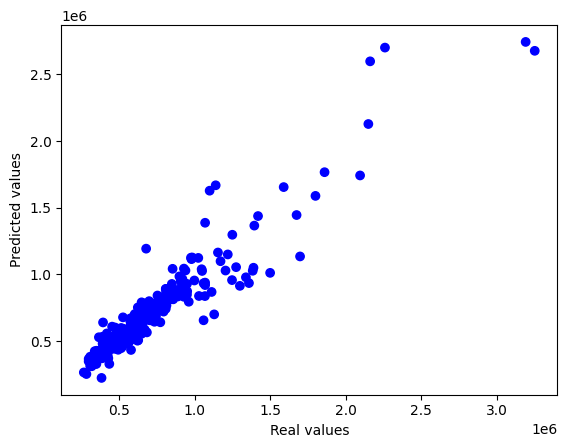

In [93]:
import matplotlib.pyplot as plt
colors = ['red' if real == predicted else 'blue' for real, predicted in zip(y_test, predictions)]

# Plot the real values and predicted values using the colors list
plt.scatter(y_test, predictions, color=colors)

# Add labels to the x-axis and y-axis
plt.xlabel('Real values')
plt.ylabel('Predicted values')

# Show the plot
plt.show()

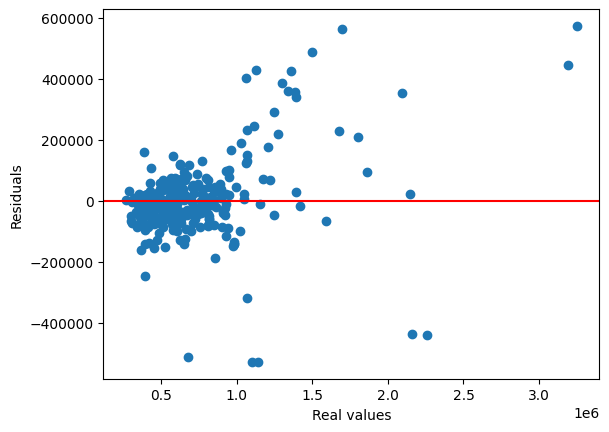

In [94]:
# Calculate the residuals (real values - predicted values)
residuals = y_test - predictions

# Plot the residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='-')

# Add labels to the x-axis and y-axis
plt.xlabel('Real values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

In [95]:
df

,Marka_Model_0,Marka_Model_1,Marka_Model_2,Marka_Model_3,Marka_Model_4,Marka_Model_5,Marka_Model_6,Marka_Model_7,Hiz,MaxTork,...,Kasa_Tipi_Pick-up,Kasa_Tipi_Sedan,Kasa_Tipi_Wagon,Konum_Akdeniz Bölgesi,Konum_Ege Bölgesi,Konum_GüneyDoğu Anadolu Bölgesi,Konum_Karadeniz Bölgesi,Konum_Marmara Bölgesi,Konum_İç Anadolu Bölgesi,Fiyat
0,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,1,0,0,0,0,0,400000
1,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,411500
2,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,1,0,0,415000
3,0,0,0,0,0,0,0,1,185.0,250.0,...,0,0,0,0,0,0,0,1,0,445000
4,0,0,0,0,0,0,0,1,187.0,175.0,...,0,0,0,0,0,0,0,1,0,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,387500
1513,0,0,0,0,0,0,0,1,170.0,95.0,...,0,0,0,0,0,0,0,1,0,390000
1514,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,0,0,0,1,0,394500
1515,0,0,0,0,0,0,0,1,175.0,230.0,...,0,0,0,0,1,0,0,0,0,395000


In [96]:
#df.to_csv('eğitimEsnasındaKUllanılanModeldf_19.04.23.csv') #This is trained data and it's date

In [97]:
new_pred =final_model.predict(X) 

In [98]:
new_pred

array([427927.8 , 391702.06, 411034.22, ..., 387202.75, 416316.75,
       377700.34], dtype=float32)

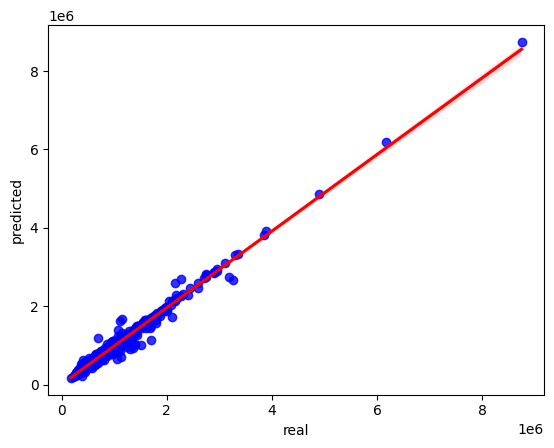

In [99]:
#ake a dataframe with the real values and the predicted values
import seaborn as sns
y = y.astype(float)
df8 = pd.DataFrame({'real': y, 'predicted': new_pred})

# Use seaborn to plot a scatterplot with a regression line and dots
sns.regplot(x='real', y='predicted', data=df8,scatter_kws={'color': 'blue'},line_kws={'color': 'red'})
plt.show()

In [100]:
df8 # check

,real,predicted
0,400000.0,427927.81250
1,411500.0,391702.06250
2,415000.0,411034.21875
3,445000.0,502702.78125
4,450000.0,498171.15625
...,...,...
1512,387500.0,387202.75000
1513,390000.0,386553.71875
1514,394500.0,387202.75000
1515,395000.0,416316.75000


MSE: 16738778014.85
RMSE: 129378.43
R2: 0.888897599764878

In [101]:
final_model.save_model("finalCalcurCar.model")

## Creating Pipeline 

## Model Deployment for Streamlit

#### #Asıl bizim için bu single_row gerekli ve bu yapılan single row'un alınıp streamlit i koyulan .py kısımda PipeLine a konulup ordan çekilip kullanılması önemli ve gerekli


In [102]:
import numpy as np
import pandas as pd
import bamboolib as bam

df_singleRow = pd.read_csv("C:\Users\PC\Desktop\GraduationProject/single_row.csv")

import pandas as pd; import numpy as np
# Step: Drop columns
df_singleRow = df_singleRow.drop(columns=['Unnamed: 0'])

df_singleRow  

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1741026178.py, line 5)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import datetime
import joblib
import pandas as pd
import numpy as np
import pandas as pd  
from scipy.sparse import hstack

class ClassForAll: #yeni dataFframe oluştursun olana eklesin  
    _OHE_categorical_columns = ['Renk','Kasa_Tipi','Konum']
    _SpecialFor_Categorical=['Aktarma','Garanti','Yakit']
    _BE_categorical_columns = ['Marka_Model']
    _LabelEncoding =['Sanziman','Model_Yili']#Made them manuel
    Yakit_dictB={
    "Dizel":2,
    "Benzin":3,
    "LPG":1
    }
    Garanti_dictB={
    "Garantisiz":0,
    "1 YIldan Uzun":2,
    "1 Yıla Kadar":1
    }
    Aktarma_dictB={
    "Önden Çekiş":0,
    "4x4":2,
    "Arkadan İtiş":1
    }
    
    Sanziman_dictB={
    "Manuel":0,
    "Otomatik":1
    }        
    def transformFullyEncodedCsrMatrix(self,df): #then this
        df[self._SpecialFor_Categorical[0]] =df[self._SpecialFor_Categorical[0]].map(self.Aktarma_dictB)
        df[self._SpecialFor_Categorical[1]] =df[self._SpecialFor_Categorical[1]].map(self.Garanti_dictB)
        df[self._SpecialFor_Categorical[2]] =df[self._SpecialFor_Categorical[2]].map(self.Yakit_dictB)
        #Stayed same place(column order)
                
        df[self._LabelEncoding[0]]=df[self._LabelEncoding[0]].map(self.Sanziman_dictB)
        if(int(df[self._LabelEncoding[1]])>=2000):#No need for joblib if Model_Yili is greater than 2000 i will remove from today's year
            df[self._LabelEncoding[1]] = datetime.datetime.now().year-df[self._LabelEncoding[1]]
        #Stayed same place(column order)

        ohe = joblib.load('./OHEPART.joblib')#One Hot Encoder
        binry_encoding = joblib.load('./hot2BinaryEncoder.joblib')
        
        df[self._OHE_categorical_columns] = df[self._OHE_categorical_columns].astype(str)
        hot = ohe.transform(df[self._OHE_categorical_columns])
        #gone to last (column order)
        hot2 = binry_encoding.transform(df[self._BE_categorical_columns])
        #print("\n Before hot2",hot2)
        #gone to last (column order)
        
        #print("\n len(hot2) ->",len(hot2))
        cold_df = df.select_dtypes(exclude=["object"])#NUmeric Columns

        
        #print("\n cold_df ->",cold_df)

        cold = csr_matrix(cold_df.values) 
        
        #print("\n hot ->",hot)
        #print("\n cold ->",cold)


            
        final_sparse_matrix = hstack((hot2,cold,hot)) 
        #print("\n final_sparse_matrix ->",final_sparse_matrix)
        final_csr_matrix = final_sparse_matrix.tocsr()
        
        #print("\n final_sparse_matrix after ->",final_sparse_matrix)
        print("final_csr_matrix.shape",final_csr_matrix.shape)
        #print("At Last df.columns -->",df.columns)

        return final_csr_matrix
    

In [ ]:
"""
#just control
ClassForAllObject = ClassForAll()
#ClassForAllObject.transformFullyEncodedCsrMatrix(df_singleRow) #deneme içindi bu
denemeDF=ClassForAllObject.transformFullyEncodedCsrMatrix(df_singleRow)

joblib.dump(ClassForAllObject, 'ClassForAllObject.joblib')
denemeDF
"""

In [ ]:
from scipy.sparse import hstack
from sklearn.base import TransformerMixin
from scipy.sparse import csr_matrix
import category_encoders  as ce
from sklearn.preprocessing import OneHotEncoder

class SparseMatrix(TransformerMixin): # Pipeline
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        #print("parameter X->\n" ,X)
        #print("\n type(parameter X)",type(X))
        getJoblib = joblib.load('ClassForAllObject.joblib')
        #print("\n type(getJoblib)-> \n ",getJoblib)
        
        res = getJoblib.transformFullyEncodedCsrMatrix(X)
        #print("res -->" , res)
        return res



In [ ]:
from sklearn.pipeline import Pipeline
import xgboost as xgb


data_pipeline = Pipeline([('sparse', SparseMatrix())])

bst = xgb.Booster()
bst.load_model('finalCalcurCar.model')

In [ ]:
single_row_transformed = data_pipeline.fit_transform(df_singleRow) ##şuanda sonunda çalıştırabildim ancak sonucunun doğruluğundan tam olarak emin deilim

#single_row_transformed şuan çalıştı ancak benim tekrardan model i düzenlemem gerekecek bunu anladım bu şart çünkü şöle bi durum var ki,burda düzenlediğinde sıra farklı oluyo model column sıralaması anlamında çok çok farklı olacak farklı olacak 